
# Libraries & Settings

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Acquire Data

In [2]:
train_path = "./Data/train.csv"

In [3]:
df_test = pd.read_csv("./Data/test.csv")

In [4]:
with open(train_path) as file:
    rows = len(file.readlines())
print(f"Train Rows = {rows}")

Train Rows = 55423857


In [5]:
df_train_tmp = pd.read_csv(train_path, nrows=5)
df_train_tmp.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                5 non-null      object 
 1   fare_amount        5 non-null      float64
 2   pickup_datetime    5 non-null      object 
 3   pickup_longitude   5 non-null      float64
 4   pickup_latitude    5 non-null      float64
 5   dropoff_longitude  5 non-null      float64
 6   dropoff_latitude   5 non-null      float64
 7   passenger_count    5 non-null      int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 448.0+ bytes


In [7]:
traintypes = {'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

In [8]:
cols = list(traintypes.keys())

In [9]:
chunk_size = 55423857

In [10]:
train_list = [] # list to hold the batch dataframe

for tmp in tqdm(pd.read_csv(train_path, usecols=cols, dtype=traintypes, chunksize=chunk_size)):
     
    tmp['pickup_datetime'] = tmp['pickup_datetime'].str.slice(0, 16)
    
    tmp['pickup_datetime'] = pd.to_datetime(tmp['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')

    train_list.append(tmp) 


1it [01:05, 65.49s/it]


In [11]:
df_train = pd.concat(train_list)

In [12]:
df_train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1
...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964,1



### Comparing Columns

In [13]:
df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float32            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float32            
 3   pickup_latitude    float32            
 4   dropoff_longitude  float32            
 5   dropoff_latitude   float32            
 6   passenger_count    uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.5 GB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 

In [14]:

# find different column
train_columns = pd.DataFrame({"Diff_Column": df_train.columns,
                            "train_data" : range(len(df_train.columns.tolist()))})

test_columns = pd.DataFrame({'Diff_Column': df_test.columns, 
                             'test_data': range(len(df_test.columns.tolist()))})

col_merged = pd.merge(train_columns, test_columns, on = 'Diff_Column', how = 'left') # compare by column name

diff_columns = []
for i in col_merged[col_merged.isnull().any(axis = 1)]['Diff_Column']:
    diff_columns.append(i)

In [15]:
# Change Column

re_index = list(df_test.columns)

for col in df_train.columns:
    if col in diff_columns :
        re_index.append(col)
        
df_train = df_train.reindex(columns = re_index)

In [16]:
train_info = pd.DataFrame(zip(df_train.columns, df_train.count(),df_train.nunique(), df_train.dtypes))
train_info.columns = ['Column', 'Count', 'Unique', 'Dtype']
test_info = pd.DataFrame(zip(df_test.columns, df_test.count(), df_test.nunique(), df_test.dtypes))
test_info.columns = ['Column', 'Count', 'Unique', 'Dtype']
pd.concat([train_info, test_info], axis = 1, join ='outer',
          keys = ['train info','test info'])#.reindex=[train_info.index]

train info                                          \
              Column     Count   Unique                Dtype   
0                key         0        0              float64   
1    pickup_datetime  55423856  3358837  datetime64[ns, UTC]   
2   pickup_longitude  55423856    98330              float32   
3    pickup_latitude  55423856   116546              float32   
4  dropoff_longitude  55423480   114629              float32   
5   dropoff_latitude  55423480   134778              float32   
6    passenger_count  55423856       15                uint8   
7        fare_amount  55423856     9405              float32   

           test info                           
              Column   Count  Unique    Dtype  
0                key  9914.0  9914.0   object  
1    pickup_datetime  9914.0  1753.0   object  
2   pickup_longitude  9914.0  9125.0  float64  
3    pickup_latitude  9914.0  9247.0  float64  
4  dropoff_longitude  9914.0  9142.0  float64  
5   dropoff_latitude  9914.0  9360.0  float64  
6    passenger_count  9914.0     6.0    int64  
7                NaN     NaN     NaN      NaN

In [17]:
df_train.drop(['key'],axis=1,inplace=True)
df_test.drop(['key'],axis=1,inplace=True)

## Data Processing

In [18]:
df_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07,5.542386e+07
mean,-3.875290e+01,1.937328e+01,-3.875261e+01,1.937341e+01,1.685380e+00,8.077921e+00
std,2.556202e+01,1.414234e+01,2.553839e+01,1.412191e+01,1.327664e+00,2.055127e+01
min,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00,-3.000000e+02
25%,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00,6.000000e+00
50%,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00,8.500000e+00
75%,-7.396708e+01,4.076713e+01,-7.396368e+01,4.076810e+01,2.000000e+00,1.250000e+01
max,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02,9.396336e+04


### Missing Value

In [19]:
round((df_train.isnull().sum()/len(df_train)*10000).sort_values(ascending=False),1)

dropoff_latitude     0.1
dropoff_longitude    0.1
fare_amount          0.0
passenger_count      0.0
pickup_latitude      0.0
pickup_longitude     0.0
pickup_datetime      0.0
dtype: float64

In [20]:
round((df_test.isnull().sum()/len(df_test)*100).sort_values(ascending=False),1)

passenger_count      0.0
dropoff_latitude     0.0
dropoff_longitude    0.0
pickup_latitude      0.0
pickup_longitude     0.0
pickup_datetime      0.0
dtype: float64

In [21]:
print("Train Null data\n")
print(df_train.isna().sum())
print("\nTest Null data\n")
print(df_test.isna().sum())

Train Null data

pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
fare_amount            0
dtype: int64

Test Null data

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [22]:
df_train = df_train.dropna(axis=0) 

In [23]:
print("Train Null data\n")
print(df_train.isna().sum())
print("\nTest Null data\n")
print(df_test.isna().sum())

Train Null data

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

Test Null data

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


## EDA

### Heatmap

In [24]:
st = df_train.apply(LabelEncoder().fit_transform)

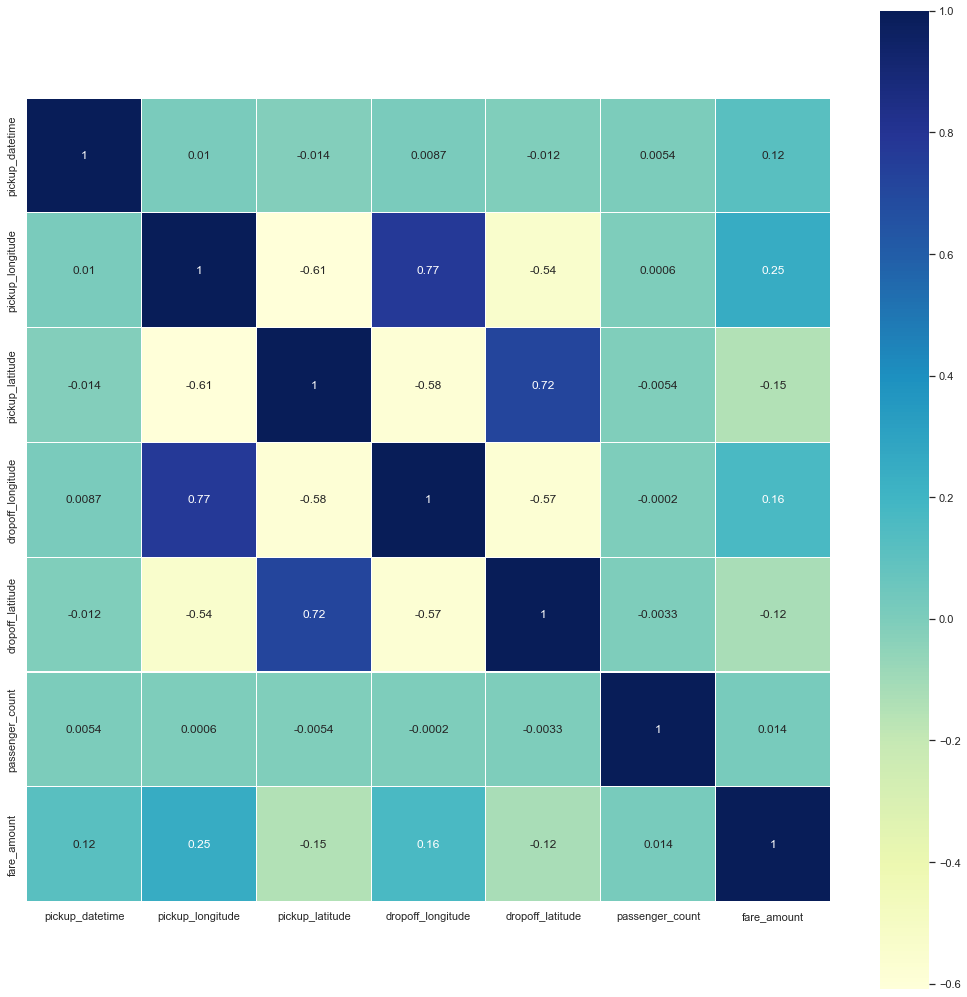

In [25]:
sns.set(color_codes=True)
plt.figure(figsize=(18, 18))

sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu"
           )
plt.show()

In [26]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [27]:
df_train.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1,4.5
1,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1,16.9
2,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2,5.7
3,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1,7.7
4,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1,5.3


In [28]:
df_test["longitude_diff"] = df_test["pickup_longitude"] - df_test["dropoff_longitude"]
df_train["longitude_diff"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
df_test["latitude_diff"] = df_test["pickup_latitude"] - df_test["dropoff_latitude"]
df_train["latitude_diff"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]

In [29]:
df_test.drop(["pickup_longitude","dropoff_longitude","pickup_latitude","dropoff_latitude"], axis=1, inplace=True)
df_train.drop(["pickup_longitude","dropoff_longitude","pickup_latitude","dropoff_latitude"], axis=1, inplace=True)

In [30]:
df_train.head()

,pickup_datetime,passenger_count,fare_amount,longitude_diff,latitude_diff
0,2009-06-15 17:26:00+00:00,1,4.5,-0.002701,0.009041
1,2010-01-05 16:52:00+00:00,1,16.9,-0.036774,-0.070702
2,2011-08-18 00:35:00+00:00,2,5.7,0.008507,0.010708
3,2012-04-21 04:30:00+00:00,1,7.7,0.004440,-0.024948
4,2010-03-09 07:51:00+00:00,1,5.3,-0.011436,-0.015755
